In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style= 'darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [21]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
train.shape

(891, 12)

In [25]:
test.shape

(418, 11)

In [26]:
np.product(train.shape)

10692

In [27]:
np.product(test.shape)

4598

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

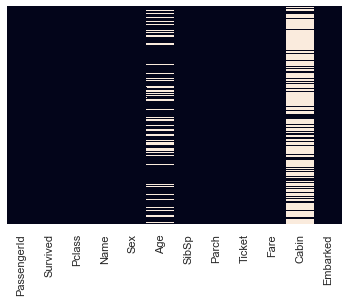

In [29]:
sns.heatmap(train.isnull(), cbar= False, yticklabels= False)

In [30]:
#checking Avg age based on passanger class
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [31]:
#checking Avg age based on gender
train.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [32]:
# fill null value of average based on passanger class
def fillage(x):
    Age= x[0]
    Pclass= x[1]
    if pd.isnull(Age):
        if Pclass== 1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [33]:
train['Age']= train[['Age', 'Pclass']].apply(fillage, axis=1)

<AxesSubplot:>

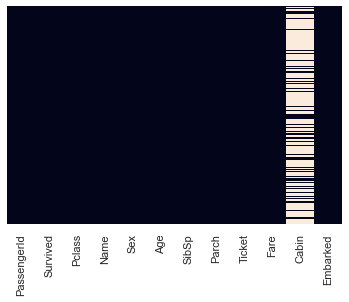

In [34]:
sns.heatmap(train.isnull(), cbar= False, yticklabels= False)

In [35]:
# for the null value of cabin we are going to drop null value
train.drop('Cabin', axis=1, inplace= True)

In [36]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [37]:
train.dropna(inplace=True)

### Converting Categorical data into binary classification

In [38]:
#we can do this by using either sklearn or creating a dummy columns
a=pd.get_dummies(train['Sex'], drop_first=True)
b=pd.get_dummies(train['Embarked'], drop_first=True)

In [39]:
train= pd.concat([train,a,b], axis=1)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [43]:
# we can convert Pclass into binary classification
c= pd.get_dummies(train['Pclass'], drop_first=True)

In [42]:
c

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [44]:
train= pd.concat([train, c], axis=1)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [46]:
# droping irrelevent columns
train.drop(['PassengerId','Pclass','Name','Sex','Ticket','Fare', 'Embarked'], axis=1, inplace=True)

#### Percentage of men and women survived

In [130]:
F= train.loc[train.male == 0]['Survived']
F_rate= sum(F)/len(F)
print("% of Female who survived:", F_rate*100)

% of Female who survived: 74.03846153846155


In [129]:
M= train.loc[train.male == 1]['Survived']
M_rate= sum(M)/len(M)
print("% of Male who survived:", M_rate*100)

% of Male who survived: 18.890814558058924


In [76]:
test = pd.read_csv('test.csv')

In [77]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
test.groupby('Pclass')['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [79]:
def fillagetest(x):
    Age= x[0]
    Pclass= x[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 41
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [80]:
test['Age']= test[['Age', 'Pclass']].apply(fillagetest, axis=1)

In [81]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [82]:
test.drop('Cabin', axis=1, inplace= True)

In [83]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [84]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [85]:
test.dropna(inplace=True)

In [86]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [87]:
p=pd.get_dummies(test['Sex'], drop_first=True)
q=pd.get_dummies(test['Embarked'], drop_first=True)
r= pd.get_dummies(test['Pclass'], drop_first=True)

In [88]:
test= pd.concat([test, p,q,r], axis=1)

In [89]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [90]:
# droping irrelevent columns
test.drop(['PassengerId','Pclass','Name','Sex','Ticket','Fare', 'Embarked'], axis=1, inplace=True)

In [91]:
test

,Age,SibSp,Parch,male,Q,S,2,3
0,34.5,0,0,1,1,0,0,1
1,47.0,1,0,0,0,1,0,1
2,62.0,0,0,1,1,0,1,0
3,27.0,0,0,1,0,1,0,1
4,22.0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
413,24.0,0,0,1,0,1,0,1
414,39.0,0,0,0,0,0,0,0
415,38.5,0,0,1,0,1,0,1
416,24.0,0,0,1,0,1,0,1


In [93]:
X= train.drop('Survived', axis=1)
y= train['Survived']

In [94]:
# splitting of data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

#### Logistic regression

In [95]:
# Training Logistic Regression model on the training set
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [96]:
#Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))

[[84 21]
 [29 44]]
0.7191011235955056


#### K-NN

In [97]:
# Training K-NN  model on the training set
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
#Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[84 21]
 [36 37]]
0.6797752808988764


#### SVM

In [99]:
# Training SVC model on the training set
from sklearn.svm import SVC
sv= SVC(kernel='linear', random_state= 0)
sv.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [100]:
#Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = sv.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))

[[85 20]
 [30 43]]
0.7191011235955056


#### DT Classification

In [101]:
# Training DT Classification model on the training set
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [102]:
#Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(accuracy_score(y_test, y_pred4))

[[85 20]
 [31 42]]
0.7134831460674157


#### Kernel SVM

In [103]:
# Training Kernel SVM model on the training set
from sklearn.svm import SVC
ksvm= SVC(kernel='rbf', random_state= 0)
ksvm.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = ksvm.predict(X_test)
print(confusion_matrix(y_test, y_pred5))
print(accuracy_score(y_test, y_pred5))

#### RFC

In [121]:
#training RF Classification model on the training set
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators= 10, criterion= 'entropy', random_state= 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [122]:
#Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6 = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred6))
print(accuracy_score(y_test, y_pred6))

[[87 18]
 [26 47]]
0.7528089887640449


#### Naive Bayes

In [107]:
#training Naive Bayes model on the training set 
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [108]:
#Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred7 = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred7))
print(accuracy_score(y_test, y_pred7))

[[87 18]
 [27 46]]
0.7471910112359551


###### Based on accuracy score Random forest model is best

In [123]:
final_pred= rfc.predict(test)

In [125]:
test['Survived']=final_pred

In [126]:
test

,Age,SibSp,Parch,male,Q,S,2,3,Survived
0,34.5,0,0,1,1,0,0,1,0
1,47.0,1,0,0,0,1,0,1,0
2,62.0,0,0,1,1,0,1,0,0
3,27.0,0,0,1,0,1,0,1,1
4,22.0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
413,24.0,0,0,1,0,1,0,1,0
414,39.0,0,0,0,0,0,0,0,1
415,38.5,0,0,1,0,1,0,1,0
416,24.0,0,0,1,0,1,0,1,0
